## Rennes Data Challenge 2023 - Prédiction du marché des cryptos

Mathis Derenne - Odilon Dakpakete - Rémy Darquin - Arshia Taheri - Landelle Kylian 

---

RMSE - Direction 

In [2]:
# Import all data visualisation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
import ipywidgets as ipy
from IPython.display import Image

sns.set_theme()
sns.set_palette("colorblind")
sns.set_style('whitegrid')
%matplotlib inline

### Load Data

In [11]:
df = pd.read_csv('data/output_data.csv', index_col=0, parse_dates=True)
df = df.asfreq('D')

### EDA

Text(0.5, 1.0, 'Number of unique values in each column')

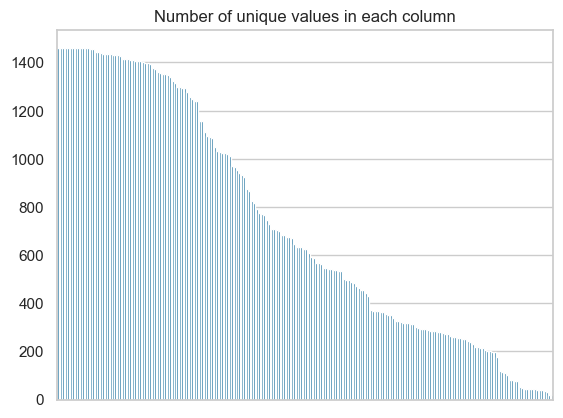

In [12]:
sns.barplot(df.nunique().sort_values(ascending=False))
plt.xticks([])
plt.title('Number of unique values in each column')

# Aucune données catégorielles

### Données manquantes

34.08 % des données sont manquantes


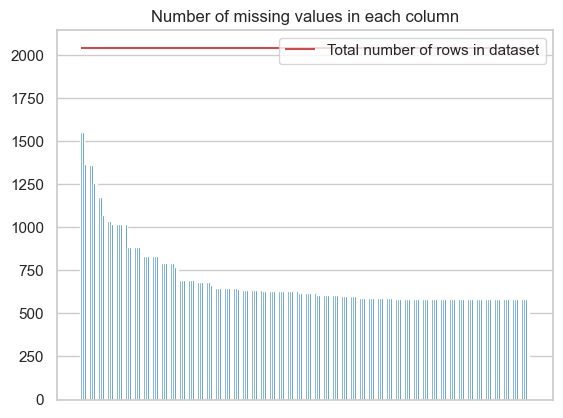

In [13]:
print(f"{df.isnull().mean().mean() * 100:.2f} % des données sont manquantes")

# Display na data for each column
df.isna().sum()
# plot using seaborn
sns.barplot(df.isna().sum().sort_values(ascending=False))
plt.xticks([])
# Show max number of na on plot
plt.hlines(df.shape[0], 0, df.shape[1], colors= 'r', label = "Total number of rows in dataset")
plt.title('Number of missing values in each column')
plt.legend();

In [14]:
# Show number of missing day between max and min date
print(f"Nombre de jours manquants entre le {df.index.min().strftime('%d/%m/%Y')} et le {df.index.max().strftime('%d/%m/%Y')} : {df['Close_BTC'].isna().sum()}")

Nombre de jours manquants entre le 17/08/2017 et le 24/03/2023 : 584


#### Objectif : montrer que les données comportent peu d'information

### Matrice de corrélation

<Axes: >

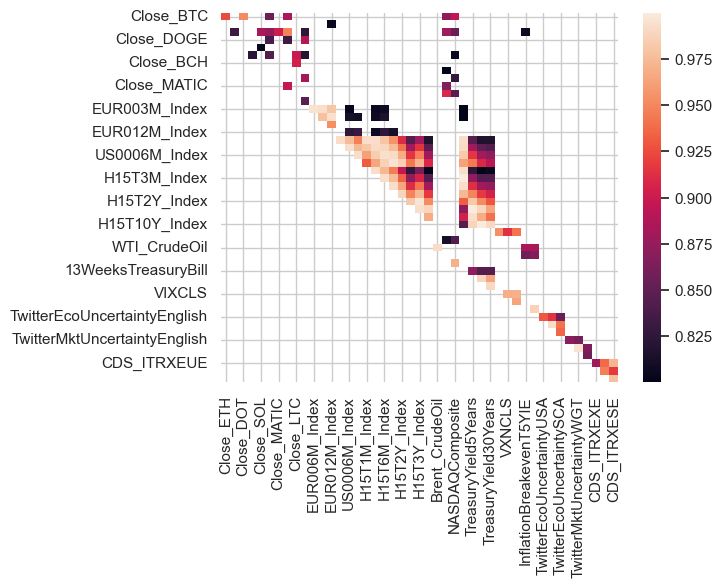

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

corr = df.corr()
# Correlation without the diagonal and only with high value of correlation
corr = corr.mask(np.tril(np.ones(corr.shape)).astype(bool))
corr = corr[corr > 0.8].dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(corr)

Text(0, 0.5, '')

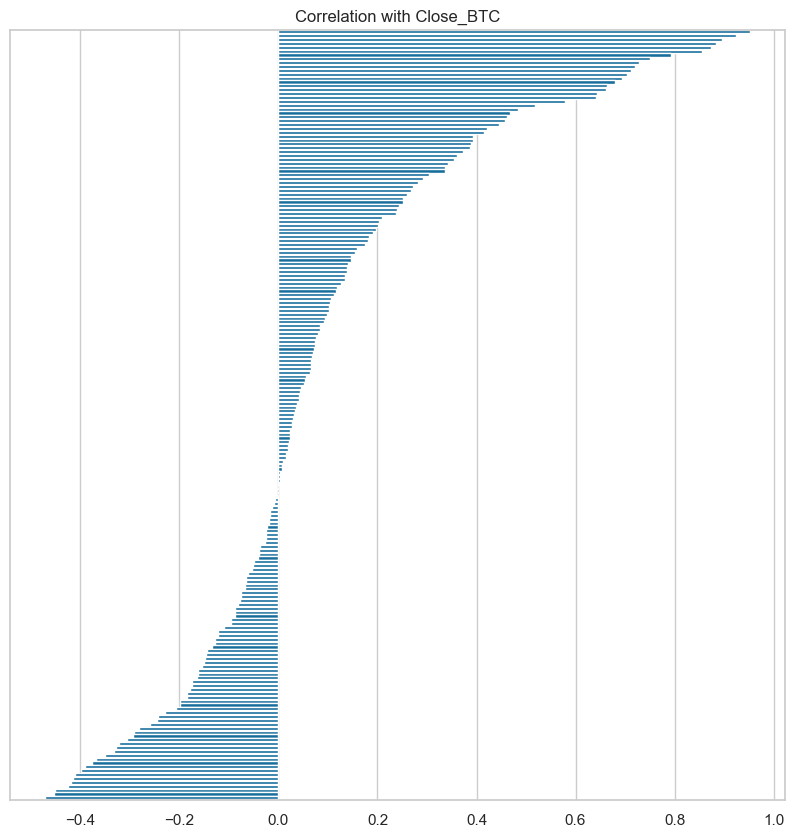

In [20]:
# Montrer les plus fortes corrélations avec Close_BTC

corr = df.corr()
corr = corr['Close_BTC'].sort_values(ascending=False).drop('Close_BTC')

plt.figure(figsize=(10, 10))
sns.barplot(x=corr.values, y=corr.index)
plt.title('Correlation with Close_BTC')
plt.yticks([]);
plt.ylabel('')